In [14]:
'''
Author: Sneha Nair
ID: 260850706
'''
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# viscosity of lava given in class(please not the units are in cm^2 s^-1)
visc = 2500
g = 980.6 
alpha = 0.52 # about thirty degrees of an inclined angle. 
H = 2 ## cm

# From here let's generate a space of x values and then we will be able to plug into the solution we have obtained. 
def velocity(position):
    vel = -g/(visc)*np.sin(alpha)*(0.5*position**2-H*position)
    return vel

## Now create an evenly space grid of x values to run and plot the velocity of the flow down the mountain.

x_pos = np.linspace(0,H,50)
y_pos = velocity(x_pos)

Text(0.5, 1.0, 'Steady State Solution for Lava flowing down the incline')

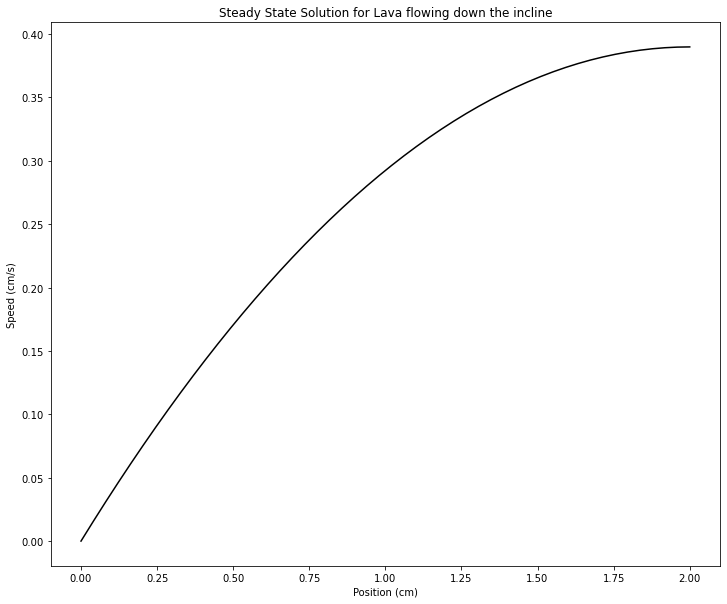

In [6]:
## Now let's plot the position and the velocity to see what we obtained. 
plt.figure(figsize=(12,10))
plt.plot(x_pos,y_pos,color='k')
plt.xlabel("Position (cm)")
plt.ylabel("Speed (cm/s)")
plt.title("Steady State Solution for Lava flowing down the incline")

In [7]:
'''
Okay let's first establish the necessary conditions to work with the advection. 
Here I will be utilizing Professor Lee's code. 
'''

## The grid size.
grid = 0.04
# The time step
time_step = 0.00001
# The beta factor 
beta = visc*time_step/(grid**2)

# Now obtaining the necessary values for the position. Note that x must go a little past the value of H since we want to 2 to be included. 
x = np.arange(0,2.1,grid)
len_x = len(x)
f1 = np.copy(x)



In [8]:
%matplotlib
''' 
Now that we have declared the necassary variables, let's begin with the plots. Heavily used Professor Eve Lee's code
to start this part of the method but modified it so that a while loop would execute the function of her for loop. 
'''

plt.ion()
fig, axes = plt.subplots(1,1)
plt1, = axes.plot(x, f1, 'ro')
fig.canvas.draw()

## Here I am going to start of with the time and ensure that ends at an optimal time. This was achieved by testing values. 
t_i =0
total_time = 0.003

## Taken from Professor Eve Lee's code
A1 = np.eye(len_x) * (1.0 + 2.0 * beta) + np.eye(len_x, k=1) * -beta + np.eye(len_x, k=-1) * -beta
## Boundary conditions
A1[0][0] = 1.0
A1[0][1] = 0 
A1[-1][-1] = 1.0 + beta

## This while loop will help us loop through the elements of f1 and then show output the necessary speed values given the positions values similar to the one found for the steady state. 
while t_i <= total_time:
    ## let's make sure it skips the case where time is equivalent to zero.
    if t_i == 0:
        t_i+=time_step
    else:
        f1 = np.linalg.solve(A1,f1)
        f1+=(980*np.sin(alpha))*time_step
        f1[0]=0
        t_i+=time_step
        plt1.set_ydata(f1)
        plt.ylim=(0,0.50)
        plt.xlim(0,2)
        plt.xlabel("Position (cm)")
        plt.ylabel("Speed (cm/s)")
        fig.canvas.draw()
        plt.pause(0.001) 
    
    


Using matplotlib backend: MacOSX


In [11]:
plt.figure(figsize=(12,10))
plt.plot(x_pos,y_pos,color='k', label="Steady State")
plt.plot(x,f1,color='r',label="Computational")
plt.xlabel("Position (cm)")
plt.ylabel("Speed (cm/s)")
plt.title("Steady State Versus Time Evolved Solution")
plt.legend()
plt.show()